In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from pattern.nl import parse, split
from collections import Counter
from gensim.models import KeyedVectors
# Need the interactive Tools for Matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from adjustText import adjust_text
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
import numpy as np
import matplotlib.pyplot as plt

stopz = 'http://rubenros.nl/wp-content/uploads/2019/08/stopwords-nl.txt'
req = requests.get(stopz)
stopz = str(req.content)
stopz = stopz.split('\\n')

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [96]:
os.chdir('D:/Rampen/models/periods')
clus = pd.read_csv('adj-kmeans-10.csv')
model = KeyedVectors.load('model-1830-1850.w2v')

In [108]:
os.chdir('D:/Rampen/ngrams')
l = sorted(glob.glob('*bigrams*'))

In [126]:
df = pd.DataFrame()

for c in l[10:99]:
    d= pd.read_csv(c)
    d = d[d['gram'].str.contains("_ramp")]
    d['gram'] = d['gram'].str.split('_').str[0]
    d = d[~d['gram'].isin(stopz)]
    d['year'] = c[0:4]
    d = d.groupby(['gram','year'],as_index=False).agg('sum')
    #d = d.reset_index(drop=True)
    df = df.append(d)

In [127]:
df = df.pivot(columns='year',index='gram',values='count')
df = df.reset_index()
df.head()

year,gram,1760,1761,1762,1763,1764,1765,1766,1767,1768,...,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,00boudingrjier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,011cr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,011herttelbasre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


created list with 537 words


C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


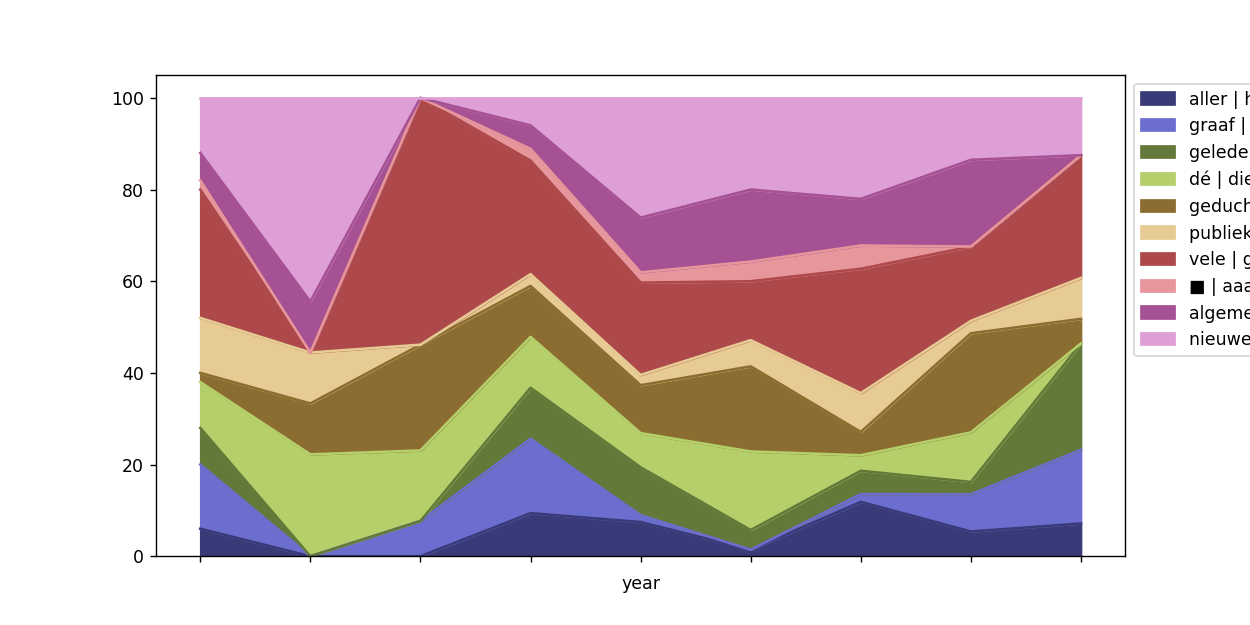

,aller | hunnen | grooten | don | dea | dep,graaf | jaren | generaal | „ | charles | senateur,geledene | bittere | zwaren | jongde | bitterfte | doorgestane,dé | dier | dè | ele | mijne | lijke,geduchte | droevige | dreigende | onberekenbare | ijsselijke | ontzettende,publieke | openbare | voorzegde | beftaande | onderfcheidene | onvermydelyke,vele | groote | zware | veele | ontelbare | grootfte,■ | aaa | ale | clc | dei | del,algemeenen | bet | nationale | bewuste | grooter | treffen,nieuwe | algemeene | soortgelijke | grootere | veelvuldige | allerlei,year,sum
0,6.000000,14.000000,8.000000,10.000000,2.000000,12.000000,28.000000,2.000000,6.000000,12.000000,1810,50.0
1,0.000000,0.000000,0.000000,22.222222,11.111111,11.111111,0.000000,0.000000,11.111111,44.444444,1811,9.0
2,0.000000,7.692308,0.000000,15.384615,23.076923,0.000000,53.846154,0.000000,0.000000,0.000000,1812,13.0
3,9.401709,16.239316,11.111111,11.111111,11.111111,2.564103,24.786325,2.564103,5.128205,5.982906,1813,117.0
4,7.462687,1.492537,10.447761,7.462687,10.447761,2.238806,20.149254,2.238806,11.940299,26.119403,1814,134.0
5,1.428571,0.000000,4.285714,17.142857,18.571429,5.714286,12.857143,4.285714,15.714286,20.000000,1815,70.0
6,11.864407,1.694915,5.084746,3.389831,5.084746,8.474576,27.118644,5.084746,10.169492,22.033898,1816,59.0
7,5.405405,8.108108,2.702703,10.810811,21.621622,2.702703,16.216216,0.000000,18.918919,13.513514,1817,37.0
8,7.142857,16.071429,23.214286,0.000000,5.357143,8.928571,26.785714,0.000000,0.000000,12.500000,1818,56.0


In [128]:
cdf = ClusterWord(MatrixPeriod(1,df),10)
dtw = GetClusterNames(cdf, df, 1810, 9)
ClusterDf(cdf, df, 1810, 9, dtw)

In [121]:
def MatrixPeriod(freq_threshold, df):
    
    df = pd.melt(df, id_vars=['gram'])
    df['year'] = df['year'].astype(int)
    df['year'] = 'tot_count'
    df = df.groupby(['gram']).sum()
    
    list_words = list(df[df['value'] > freq_threshold].index)
    
    
    dmx = DistanceMatrix(list_words, model)
    
    return dmx

def DistanceMatrix(list_words, model):
    
    list_words = [w for w in list_words if w in list(model.vocab)]
    print("created list with " + str(len(list_words)) + " words")

    total_list = list()
    
    for word in list_words:
        
        list_word = list()
        
        for term in list_words:
            #tmp = model.distance(word, term)
            tmp = model.similarity(word, term)

            list_word.append(tmp)
        
        total_list.append(list_word)
    df = pd.DataFrame(total_list, columns = list_words, index = list_words)
    return df

def ClusterWord(matrix, k):
    centroids,_ = kmeans(matrix,k)
    idx,_ = vq(matrix,centroids)
    
    return dict(zip(list(matrix.index), idx))


def GetClusterNames(clus_dict, df, start_year, interval):
    start_column = list(df.columns).index(str(start_year))
    df = df.iloc[:,np.r_[0,start_column:start_column+interval]]
    
    df = df[df.gram.isin([k for k,v in clus_dict.items()])]
    
    dict_topwords_cluster = dict()
    
    for cluster_id in list(set([v for k,v in clus_dict.items()])):
        list_words_cluster = [k for k,v in clus_dict.items() if v == cluster_id]
        
        tmpdf = df[df.gram.isin(list_words_cluster)]
        tmpdf['word_sum'] = tmpdf.iloc[:,1:len(tmpdf.columns)].sum(axis=1)
        
        topwords = list(tmpdf.nlargest(6,'word_sum').gram)
        topwords = " | ".join(topwords)
        dict_topwords_cluster.update({str(cluster_id):topwords})
        
        
    return dict_topwords_cluster

def ClusterDf(clus_dict, df, start_year, interval, dict_topwords_cluster):
    start_column = list(df.columns).index(str(start_year))
    df = df.iloc[:,np.r_[0,start_column:start_column+interval]]
    
    df = df[df.gram.isin([k for k,v in clus_dict.items()])]
    
    cluster_sums_dict = dict()
    
    # Calculate Diachronic Sums of Clusters
    for cluster_id in list(set([v for k,v in clus_dict.items()])):
        list_words_cluster = [k for k,v in clus_dict.items() if v == cluster_id]
        
        tmpdf = df[df.gram.isin(list_words_cluster)]
        
        tmpdf_sums = list(tmpdf.iloc[:,1:len(tmpdf.columns)].sum(axis=0))
        
        cluster_sums_dict.update({cluster_id:tmpdf_sums})
        
    cluster_sums = pd.DataFrame.from_dict(cluster_sums_dict)
    cluster_sums['year'] = list(range(start_year,start_year+interval))
    cluster_sums.columns = cluster_sums.columns.astype(str)
    
    cluster_sums['sum'] = cluster_sums.iloc[:,0:len(cluster_sums.columns)-1].sum(axis=1)
    
    for column in list(cluster_sums.columns)[0:len(cluster_sums.columns)-2]:
        cluster_sums[column] = cluster_sums[column] / cluster_sums['sum'] * 100
    
    range_years = [str(y) for y in list(cluster_sums.columns)[0:len(cluster_sums.columns)-2]]
    
    ### Set top words as labels
    cluster_sums.columns = list([v for k,v in dict_topwords_cluster.items()]) + ['year', 'sum']    
    cluster_sums['year'] = cluster_sums['year'].astype(str)
    cluster_sums.plot(x="year", y = list([v for k,v in dict_topwords_cluster.items()]), kind="area", colormap = "tab20b", figsize=(10,5)).legend(bbox_to_anchor=(1, 1))
    return cluster_sums

In [23]:
model = KeyedVectors.load('model-1830-1850.w2v')

In [27]:
adjs = [w for w in adj if w in list(m.wv.vocab.keys())]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [28]:
def DistanceMatrix(list_words, model):
    
    list_words = [w for w in list_words if w in list(model.vocab)]
    print("created list with " + str(len(list_words)) + " words")

    total_list = list()
    
    for word in list_words:
        
        list_word = list()
        
        for term in list_words:
            #tmp = model.distance(word, term)
            tmp = model.similarity(word, term)

            list_word.append(tmp)
        
        total_list.append(list_word)
    df = pd.DataFrame(total_list, columns = list_words, index = list_words)
    return df

In [34]:
d = DistanceMatrix(list(set(adjs)),m)

created list with 199 words


C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [35]:
d.to_csv('dm-adjectives.csv')

NameError: name 'nx' is not defined